# Interactive Notebook - Solar-Powered Grid Simulator

Welcome to the Solar-powered grid simulator. This model is build as a project for the Complex System Simulation course (June, 2018). Here we provide the basic elements to run and visualize your own solar-powered grid simulator.


We provide three topologies to play with:

* Mean-field approach
* Network
* Cellular automata

In [1]:
# import packages
import numpy
import matplotlib.pyplot as plt
from matplotlib import animation, rc
from copy import deepcopy
from matplotlib.patches import Patch
import datetime
from IPython.display import HTML
import warnings
warnings.filterwarnings('ignore')

# Mean-field approach

Here you can play around with the mean-field model. You can set the amplitude of the production sine function $a$, the constant consumption rate $c$ and the battery capacity denoted $\texttt{max_power}$. For $c = a / \pi$ we expect a perfect limit cycle. If $c < a / \pi$ the total energy will keep rising and for $c < a / \pi$ the total energy will decrease.

In [2]:
# import all functions for mean-field approach from mean_field_sin.py
from Network.mean_field_sin import *

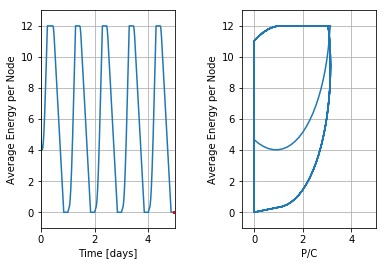

In [3]:
# set independent variables for the system
N = 50                  # Number of nodes
max_it = 500            # Number of iterations
init_value = 5          # Initial value for all nodes
a = 1                   # Amplitude sine function
c = a / np.pi           # Constant consumption value
dt = 0.01               # Integration step
max_power = 12          # Battery Capacity

anim = animate_meanfield(N, a, c, init_value, max_power, max_it, dt, jupyter=True)

HTML(anim.to_html5_video())

# Network approach

In [ ]:
# import all function for network approach from anim_network.py
from Network.anim_network import *

In [ ]:
# set independent variables of the system
N =  20                 # number of nodes in the network
days = 10               # number of days to simulate
max_it = 30            # amount of steps
init_power = 2          # initial energy for each node
min_power = 2           # minimal energy nodes keep for themselves, the rest is shared with the neighbors
max_power = 4           # maximum energy nodes can have
a_max = 10              # maxium alpha
a_min = 0               # minimum alpha
network = "barabasi"    # choose network: random, watts, barabasi, ring
p = 0.2                 # probability of edge formation
k = 4                   # set parameter for network initialization
share_energy = True     # whether nodes can share energy


# set dependent variables of the system
steps_per_day = max_it / days
beta = 1.5 * ((a_max+a_min)/2) / np.pi / steps_per_day

anim = animate_network(N, days, max_it, init_power, min_power, max_power, a_max, a_min, network, p, k, share_energy, beta, save = False, jupyter = True)

In [ ]:
# Call function to display the animation
HTML(anim.to_html5_video())

# Cellular Automata Approach

In [ ]:
# import CA class and animate function from cellular_automata.py
from CA.cellular_automata import *

In [ ]:
# set potential production = potential consumption
alpha_min = 0
alpha_max = 10
beta = ((alpha_min + alpha_max) / 2) * 0.31831

# set number of steps
max_step = 500

# initialize CA
c = CA(n = 25,
       days = 10,
       max_step = 500,
       energy_start = 1.59 / 2,
       alpha_min = alpha_min,
       alpha_max = alpha_max,
       beta = beta,
       energy_max = 1.59,
       energy_min = 1.59,
       max_transfer = 0,
       cells_can_die = True,
       take_panels_if_died = False)

# runs and animates the cellular automata
anim = animate_CA(c, save = False, jupyter = True)

In [ ]:
# Call function to display the animation
HTML(anim.to_html5_video())